# BAT.jl Tutorial - Poisson Counting Experiment

In [1]:
using BAT
using Distributions 
using IntervalSets
using ShapesOfVariables
using Plots
using ArraysOfArrays
using StatsBase 

## The Situation
We want to measure a source in the presence of background. 
For example, this could be a radioactive element that is to be measured in a laboratory and is therefore background from natural radioactivity.


## 1. Background only measurement
A measurement without the signal source yields a number of $N_B=10$ counts.
### Task: 
Perform a Bayesian analysis of this situation to estimate the parameter describing the backound count rate $\lambda_b$.

In [2]:
struct Background<:AbstractDensity
    k::Float64 # observed counts
end

function BAT.density_logval(target::Background, params::Union{NamedTuple,AbstractVector{<:Real}})
    return logpdf(Poisson(params[1][1]), target.k) # poisson log-likelihood
end

In [3]:
# Number of observed background events
kb = 10
likelihood_B = Background(kb)

prior_B = NamedPrior(
    λb = 0..30
)

posterior_B = PosteriorDensity(likelihood_B, prior_B)

PosteriorDensity{Background,DistributionDensity{NamedPrior{(:λb,),Tuple{Uniform{Float64}},Tuple{ShapesOfVariables.VariableDataAccessor{ScalarShape{Real}}},Tuple{HyperRectBounds{Float64}}}},HyperRectBounds{Float64},VarShapes{(:λb,),Tuple{ShapesOfVariables.VariableDataAccessor{ScalarShape{Real}}}}}(Background(10.0), DistributionDensity{NamedPrior{(:λb,),Tuple{Uniform{Float64}},Tuple{ShapesOfVariables.VariableDataAccessor{ScalarShape{Real}}},Tuple{HyperRectBounds{Float64}}}}(NamedPrior{(:λb,),Tuple{Uniform{Float64}},Tuple{ShapesOfVariables.VariableDataAccessor{ScalarShape{Real}}},Tuple{HyperRectBounds{Float64}}}(
_distributions: (λb = Uniform{Float64}(a=0.0, b=30.0),)
_shapes: VarShapes{(:λb,),Tuple{ShapesOfVariables.VariableDataAccessor{ScalarShape{Real}}}}((λb = ShapesOfVariables.VariableDataAccessor{ScalarShape{Real}}(ScalarShape{Real}(), 0, 1),), 1)
_bounds: (λb = HyperRectBounds{Float64}(HyperRectVolume{Float64}([0.0], [30.0]), BoundsType[reflective_bounds]),)
)
), HyperRectBounds{Fl

In [4]:
algorithm = MetropolisHastings()
nchains = 8
nsamples = 10^5

100000

In [5]:
samples_B, sampleids_B, stats_B, chains_B = rand(MCMCSpec(algorithm, posterior_B), nsamples, nchains);

┌ Info: Trying to generate 8 viable MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:160
┌ Info: Selected 8 MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:269
┌ Info: Begin tuning of 8 MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:52
┌ Info: MCMC Tuning cycle 1 finished, 8 chains, 0 tuned, 8 converged.
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:84
┌ Info: MCMC Tuning cycle 2 finished, 8 chains, 0 tuned, 8 converged.
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:84
┌ Info: MCMC Tuning cycle 3 finished, 8 chains, 0 tuned, 8 converged.
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:84
┌ Info: MCMC Tuning cycle 4 finished, 8 chains, 0 tuned, 8 converged.
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:

In [8]:
par_names=["\$\\lambda_b\$"]
plot(posterior_B, samples_B, :λb, xlabel = par_names[1], ylabel = "P($(par_names[1]))")
plot!(prior_B, :λb)

200
MCMCBasicStats{Float64,Float64}(BasicMvStatistics{Float64,FrequencyWeights}(1, [11.006466414848784], [10.98541022727633], [29.958334900436746], [1.3333963488624452]), BasicUvStatistics{Float64,FrequencyWeights}(OnlineUvMean{Float64}(-1.3778232120898303e7, 2.301051e6), OnlineUvVar{Float64,FrequencyWeights}(800000, 2.301051e6, 1.1534257e7, -5.987799540687421, 1.1826539093023478e6), -5.479759024799576, -16.961712973781932), [10.000006873222164])

In [38]:
print(stats_B)

MCMCBasicStats{Float64,Float64}(BasicMvStatistics{Float64,FrequencyWeights}(1, [11.006466414848784], [10.98541022727633], [29.958334900436746], [1.3333963488624452]), BasicUvStatistics{Float64,FrequencyWeights}(OnlineUvMean{Float64}(-1.3778232120898303e7, 2.301051e6), OnlineUvVar{Float64,FrequencyWeights}(800000, 2.301051e6, 1.1534257e7, -5.987799540687421, 1.1826539093023478e6), -5.479759024799576, -16.961712973781932), [10.000006873222164])

Questions:
* What is the distribution of the posterior? What is the best estimator for the parameter?

## 2. Further Background only measurement
A second measurement without the signal source yields a number of $N_B=8$ counts.

Use posterior of first backoground measurement as prior (analytic)

In [21]:
# replace by analytic poisson prior
hist_10 = fit(Histogram, flatview(samples_B.params)[1, :], FrequencyWeights(samples_B.weight), nbins = 400, closed = :left)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  1.3:0.1:30.0
weights: [1, 1, 1, 2, 4, 5, 8, 11, 22, 15  …  12, 3, 12, 4, 3, 7, 4, 5, 4, 2]
closed: left
isdensity: false

In [39]:
# Number of observed background events
kb2 = 8
likelihood_B2 = Background(kb2)

prior_B2 = NamedPrior(
    λb = BAT.HistogramAsUvDistribution(hist_10) # replace by analytic poisson prior
)

prior_B2flat = NamedPrior(
    λb = 0..30
)

posterior_B2 = PosteriorDensity(likelihood_B2, prior_B2)
likelipost_B2 = PosteriorDensity(likelihood_B2, prior_B2flat)
;

In [32]:
samples_B2, sampleids_B2, stats_B2, chains_B2 = rand(MCMCSpec(algorithm, posterior_B2), nsamples, nchains);
likelipost_samples_B2, likelids_B2, likeli_stats_B2, like_chains_B2 = rand(MCMCSpec(algorithm, likelipost_B2), nsamples, nchains);

┌ Info: Trying to generate 8 viable MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:160
┌ Info: Selected 8 MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:269
┌ Info: Begin tuning of 8 MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:52
┌ Info: MCMC Tuning cycle 1 finished, 8 chains, 8 tuned, 8 converged.
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:84
┌ Info: MCMC tuning of 8 chains successful after 1 cycle(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:88
┌ Info: Trying to generate 8 viable MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:160
┌ Info: Selected 8 MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:269
┌ Info: Begin tuning of 8 MCMC chain(s).
└ @ BAT /home/corn

200


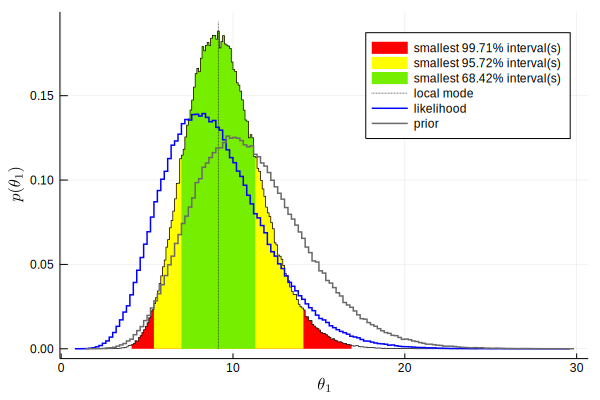

In [37]:
plot(posterior_B2, samples_B2, :λb, xlabel = par_names[1], ylabel = "P($(par_names[1]))")
plot!(likelipost_B2, likelipost_samples_B2, :λb, seriestype=:stephist, linecolor=:blue,linewidth=1.5, localmode=false, label="likelihood")
plot!(prior_B2, :λb, linewidth=1.5)

## 3. Signal + Background
Measurement with source: $N_{S+B}=12$

In [55]:
struct SignalAndBackground<:AbstractDensity
    k::Float64 # observed counts
end

function BAT.density_logval(target::SignalAndBackground, params::Union{NamedTuple,AbstractVector{<:Real}})
    return logpdf(Poisson(params[1][1]), target.k) + logpdf(Poisson(params[1][1] + params[2][1]), target.k)  # poisson log-likelihood
end

kSB = 5
likelihood_SB = SignalAndBackground(kSB)

SignalAndBackground(5.0)

In [56]:
hist_B2 = fit(Histogram, flatview(samples_B2.params)[1, :], FrequencyWeights(samples_B2.weight), nbins = 400, closed = :left)
B2 = BAT.HistogramAsUvDistribution(hist_B2);

In [57]:
prior_SB = NamedPrior(
    λb = B2,
    λs = 0..30
)

posterior_SB = PosteriorDensity(likelihood_SB, prior_SB);

In [58]:
samples_SB, sampleids_SB, stats_SB, chains_SB = rand(MCMCSpec(algorithm, posterior_SB), nsamples, nchains);

┌ Info: Trying to generate 8 viable MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:160
┌ Info: Selected 8 MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:269
┌ Info: Begin tuning of 8 MCMC chain(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:52
┌ Info: MCMC Tuning cycle 1 finished, 8 chains, 0 tuned, 8 converged.
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:84
┌ Info: MCMC Tuning cycle 2 finished, 8 chains, 8 tuned, 8 converged.
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:84
┌ Info: MCMC tuning of 8 chains successful after 2 cycle(s).
└ @ BAT /home/cornelius/.julia/packages/BAT/rhyTy/src/samplers/mcmc/mcmc_tuner.jl:88


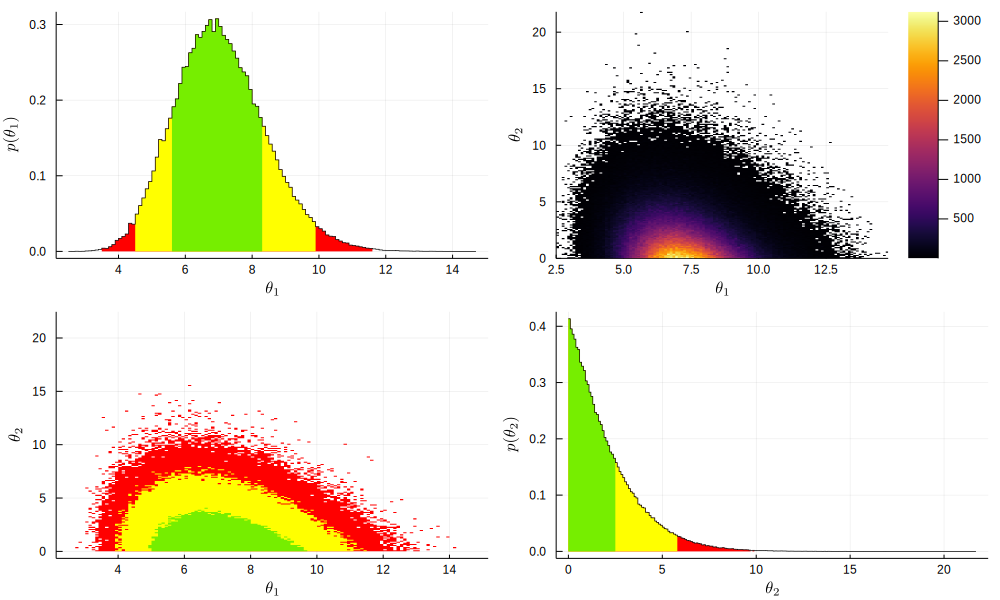

In [59]:
plot(samples_SB)

## Error propagation

### a) use $ϵ \propto $ Normaldistribution

### b) Binomial analysis of calibration measurement with known source (neglect background because of high signal rate)
assume: expected calibration source rate $N_\text{expected} = 1000$ and measured by the detector $N_\text{measured} = 123$